In [25]:
## Topic: Diamonds -- Value
#Question can different qualities predict the price of a diamond?

In [61]:
# import programs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [27]:
#import dataset
data = pd.read_csv("/Users/Olivia/Desktop/diamonds.csv")

In [28]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [30]:
# no null
#drop unnamed column
data.drop('Unnamed: 0', inplace = True, axis = 1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [32]:
## Information about data
# A data frame with 53940 rows and 10 variables:
'''
price: price in US dollars (\$326--\$18,823)
carat: weight of the diamond (0.2--5.01)
cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color: diamond colour, from J (worst) to D (best)
clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x: length in mm (0--10.74)
y: width in mm (0--58.9)
z: depth in mm (0--31.8)
depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
table: width of top of diamond relative to widest point (43--95)
'''


'\nprice: price in US dollars (\\$326--\\$18,823)\ncarat: weight of the diamond (0.2--5.01)\ncut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)\ncolor: diamond colour, from J (worst) to D (best)\nclarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))\nx: length in mm (0--10.74)\ny: width in mm (0--58.9)\nz: depth in mm (0--31.8)\ndepth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)\ntable: width of top of diamond relative to widest point (43--95)\n'

In [33]:
## Notes:
# there are no non-null values
# but need to confirm that that the information is correct

In [34]:
print("Cut:\n",data.cut.value_counts())
print("\n")

print("Color:\n",data.color.value_counts())
print("\n")

print("Clarity:\n",data.clarity.value_counts())
print("\n")

Cut:
 Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


Color:
 G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


Clarity:
 SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64




In [35]:
# Reassign the objects in cut, color, and clarity 
# with 0 being assign to the poorest quality and the highest number to the highest quality

# CUT:
# Fair == 0 
# Good == 1
# Very Good == 2
# Premium == 3
# Ideal == 4

In [12]:
df = data
# df is to be analyzed while data is the original

In [36]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
df.loc[df["cut"] == "Fair", "cut"] = "0"
df.loc[df["cut"] == "Good", "cut"] = "1"
df.loc[df["cut"] == "Very Good", "cut"] = "2"
df.loc[df["cut"] == "Premium", "cut"] = "3"
df.loc[df["cut"] == "Ideal", "cut"] = "4"

df = pd.DataFrame(df)

df['cut'] = df['cut'].astype('int')

In [40]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df.loc[df["color"] == "J", "color"] = "0"
df.loc[df["color"] == "I", "color"] = "1"
df.loc[df["color"] == "H", "color"] = "2"
df.loc[df["color"] == "G", "color"] = "3"
df.loc[df["color"] == "F", "color"] = "4"
df.loc[df["color"] == "E", "color"] = "5"
df.loc[df["color"] == "D", "color"] = "6"

df['color'] = df['color'].astype('int')

In [43]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df.loc[df["clarity"] == "I1", "clarity"] = "0"
df.loc[df["clarity"] == "SI2", "clarity"] = "1"
df.loc[df["clarity"] == "SI1", "clarity"] = "2"
df.loc[df["clarity"] == "VS2", "clarity"] = "3"
df.loc[df["clarity"] == "VS1", "clarity"] = "4"
df.loc[df["clarity"] == "VVS2", "clarity"] = "5"
df.loc[df["clarity"] == "VVS1", "clarity"] = "6"
df.loc[df["clarity"] == "IF", "clarity"] = "7"

df['clarity'] = df['clarity'].astype('int')

In [46]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [47]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [49]:
df.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table

In [50]:
## Correlation between features:

corr = df.corr()
corr

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


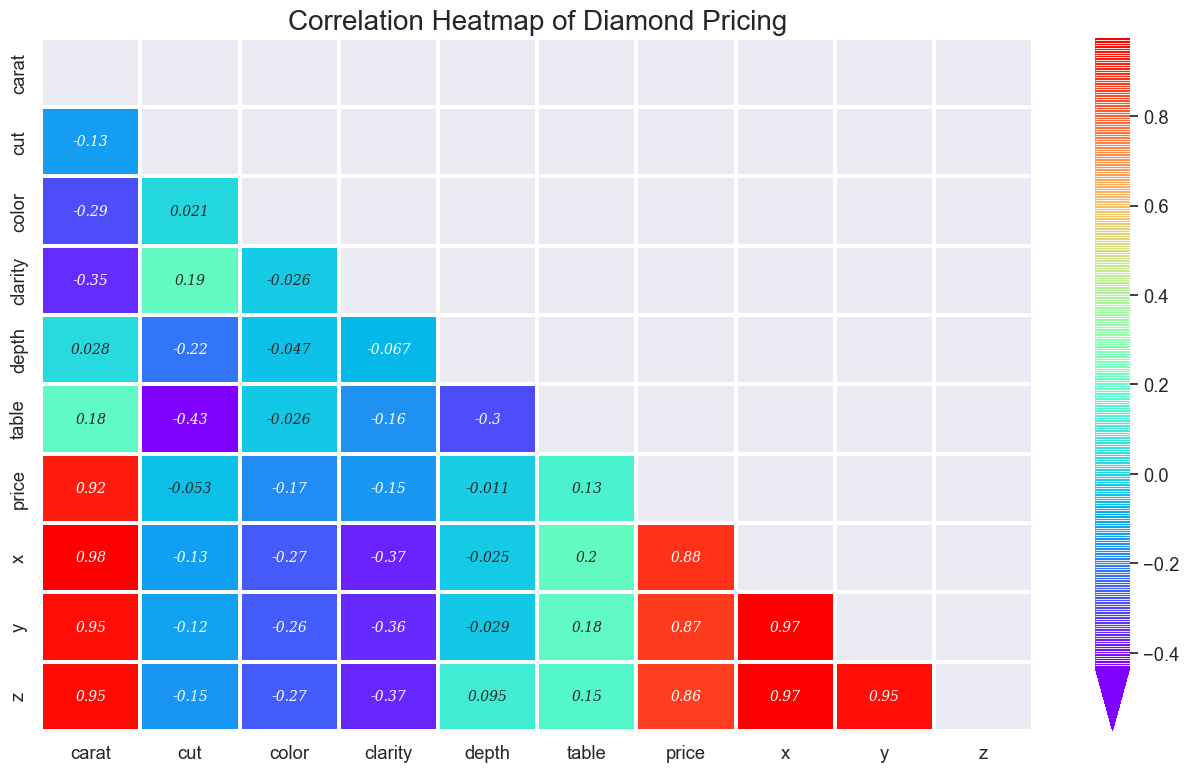

In [51]:
# Little hard to read so we'll add a heatmap
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(corr)

# Generate heatmap correlation
ax = sns.heatmap(corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of Diamond Pricing', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

In [52]:
# From the heatmap, we can see that the following have the greatest influence on price:
# carat
# and dimensions (x (length), y (width), z (depth))

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

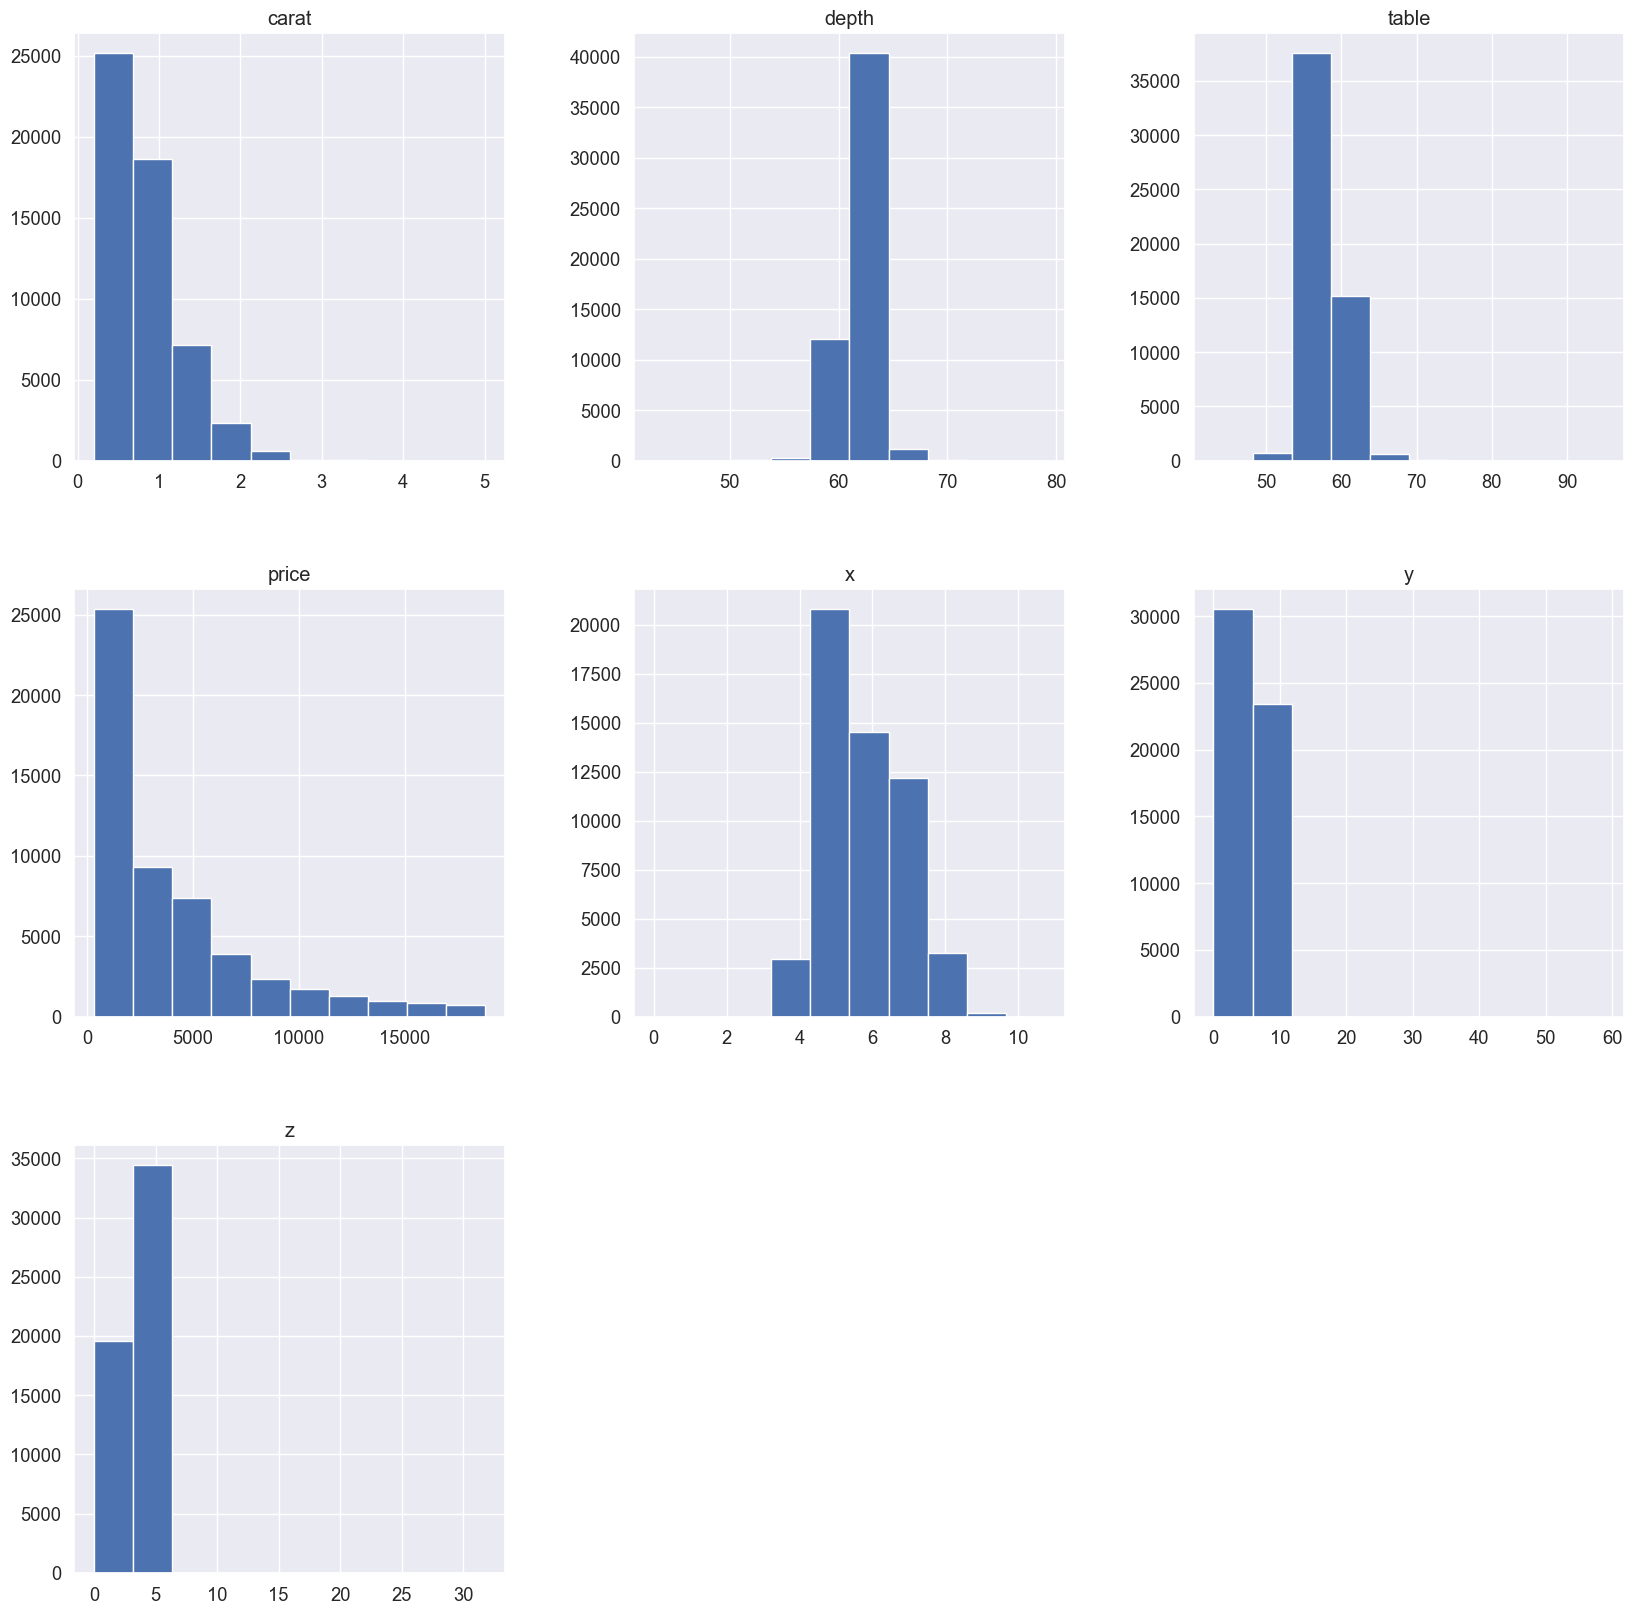

In [76]:
data.hist(figsize=(20, 20))

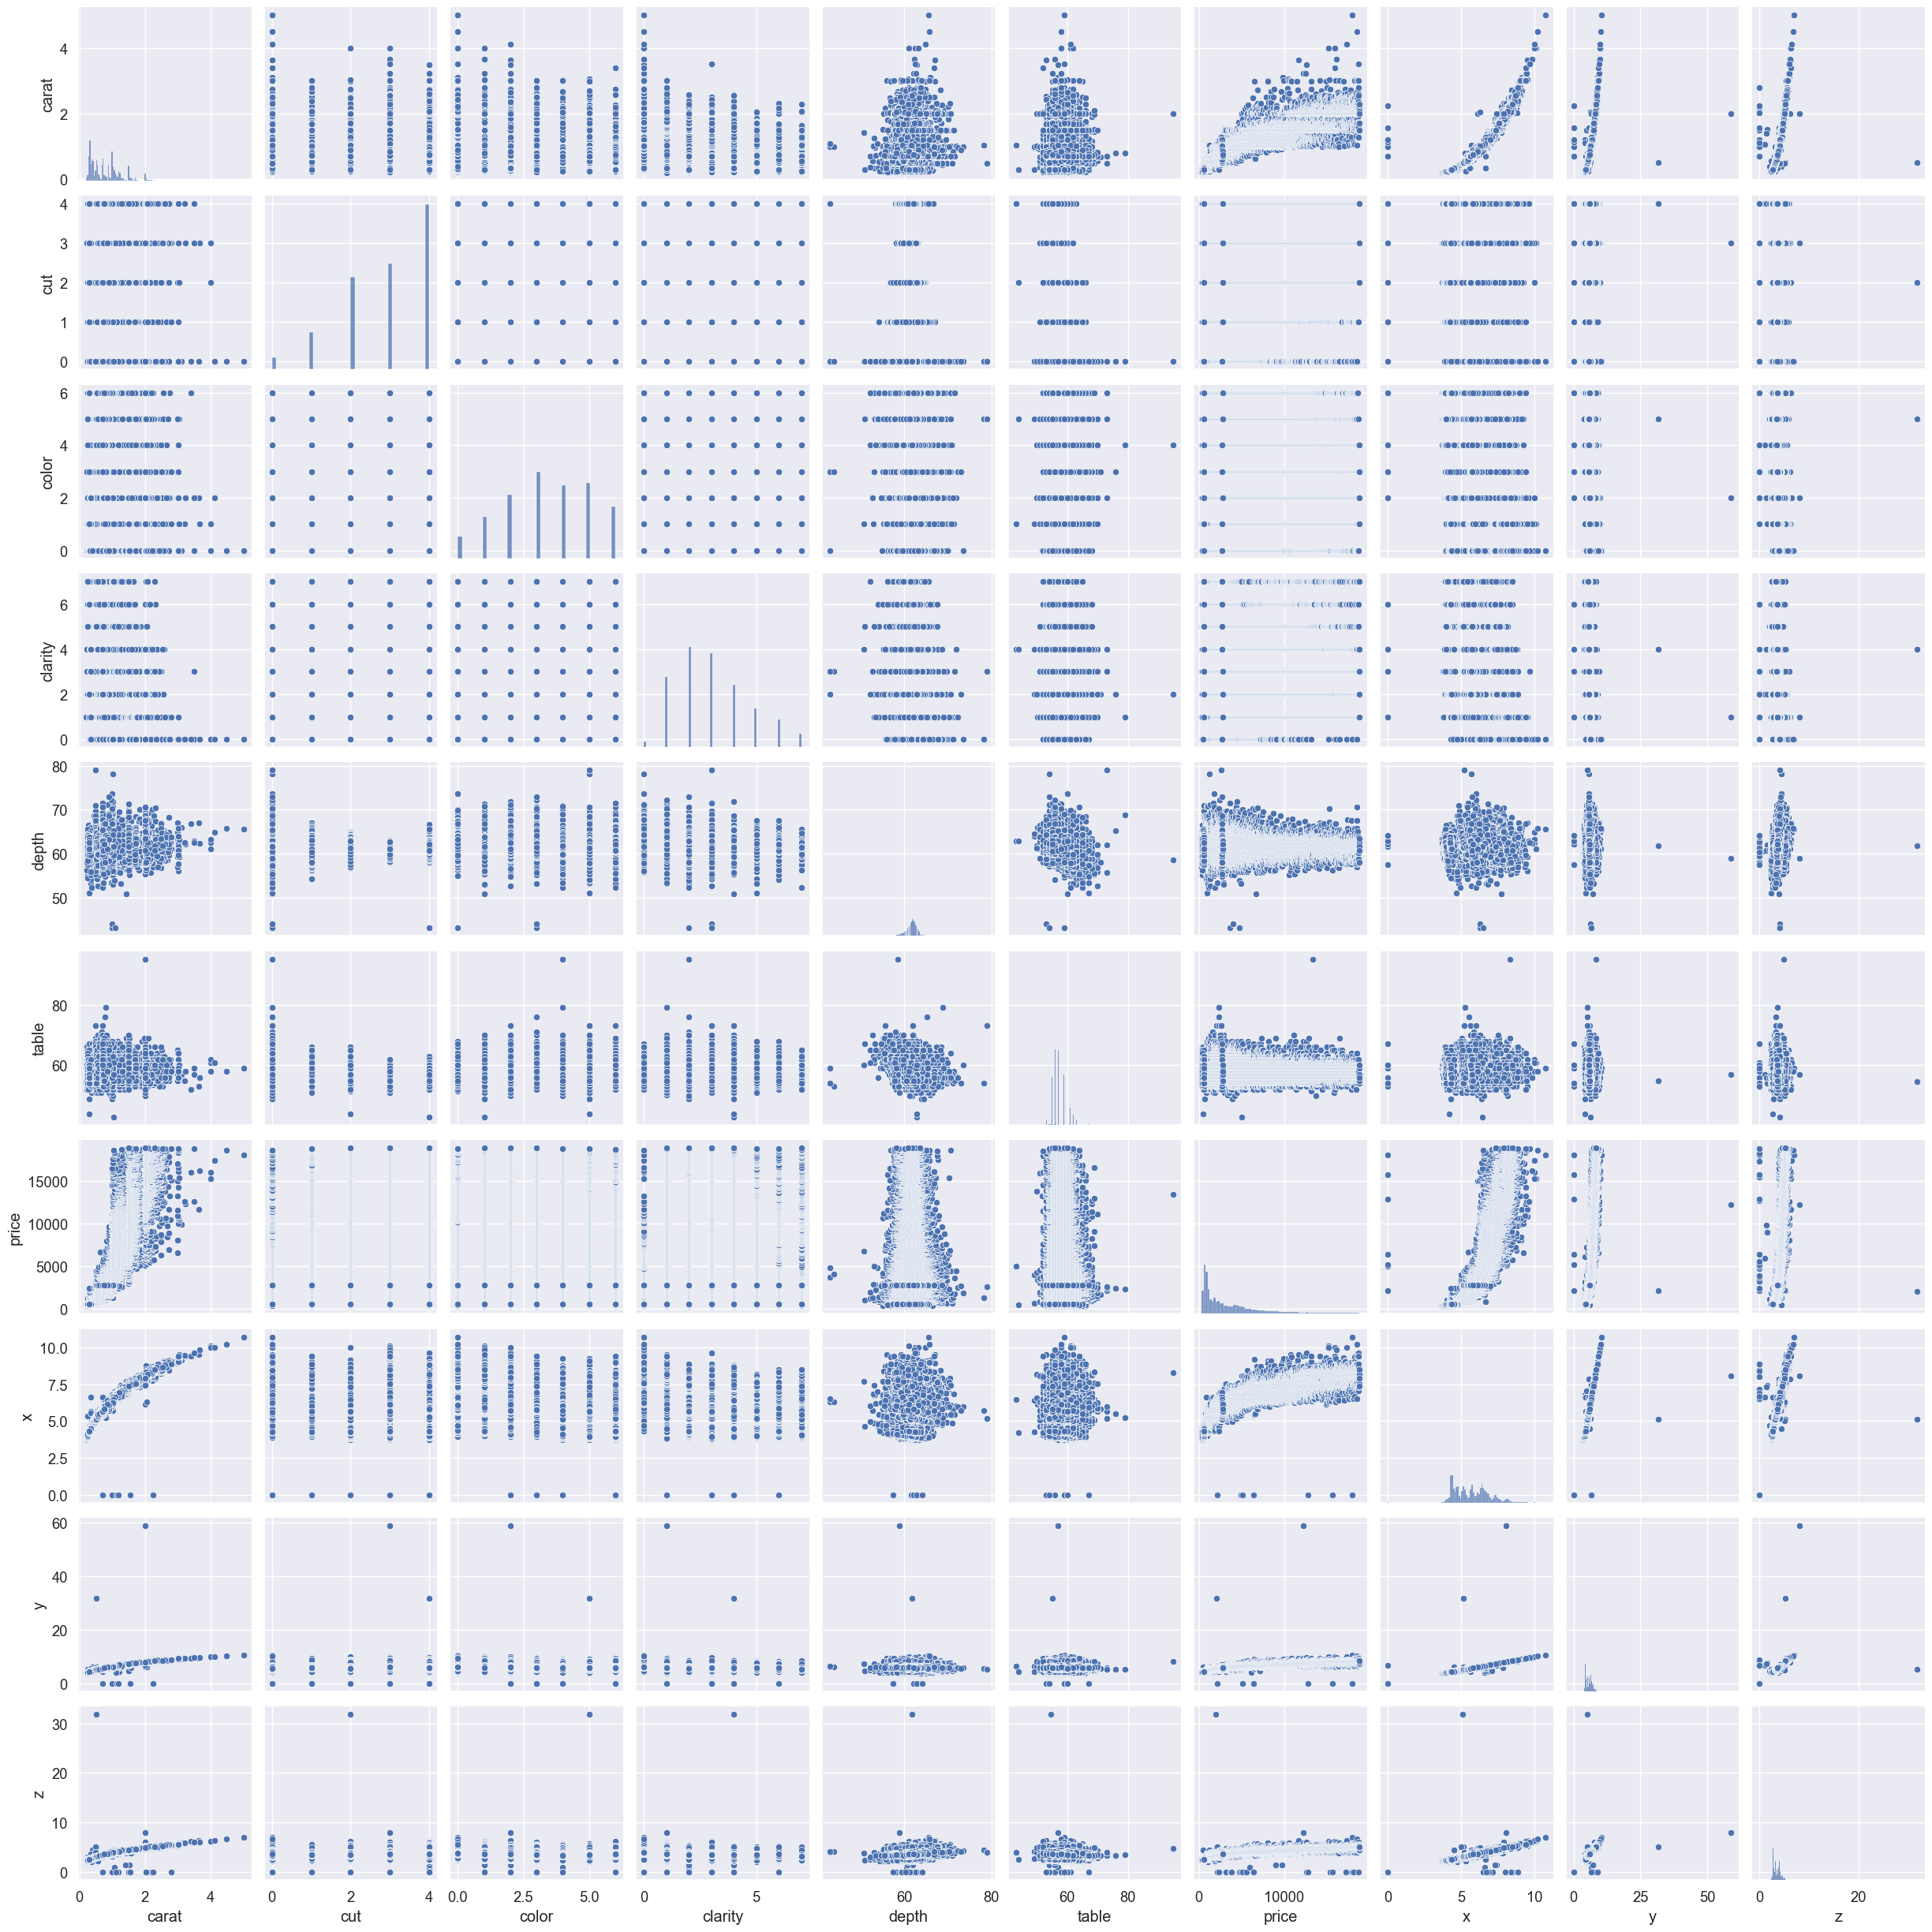

In [54]:
sns.pairplot(df)

Text(0.5, 1.0, 'Carat vs. Color vs. Price')

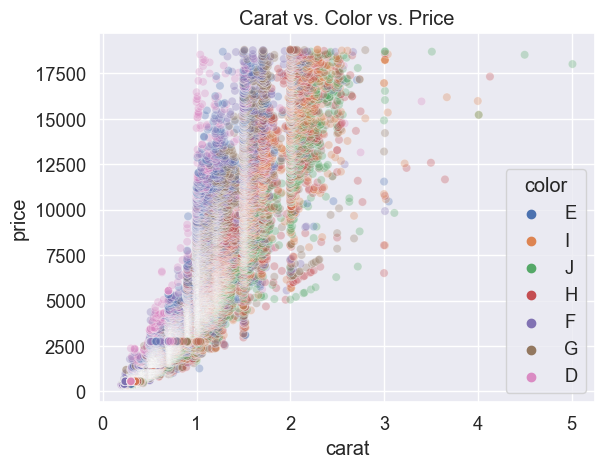

In [75]:
sns.scatterplot(x='carat',y='price',data=data,hue='color', alpha = 0.3)
plt.title("Carat vs. Color vs. Price")

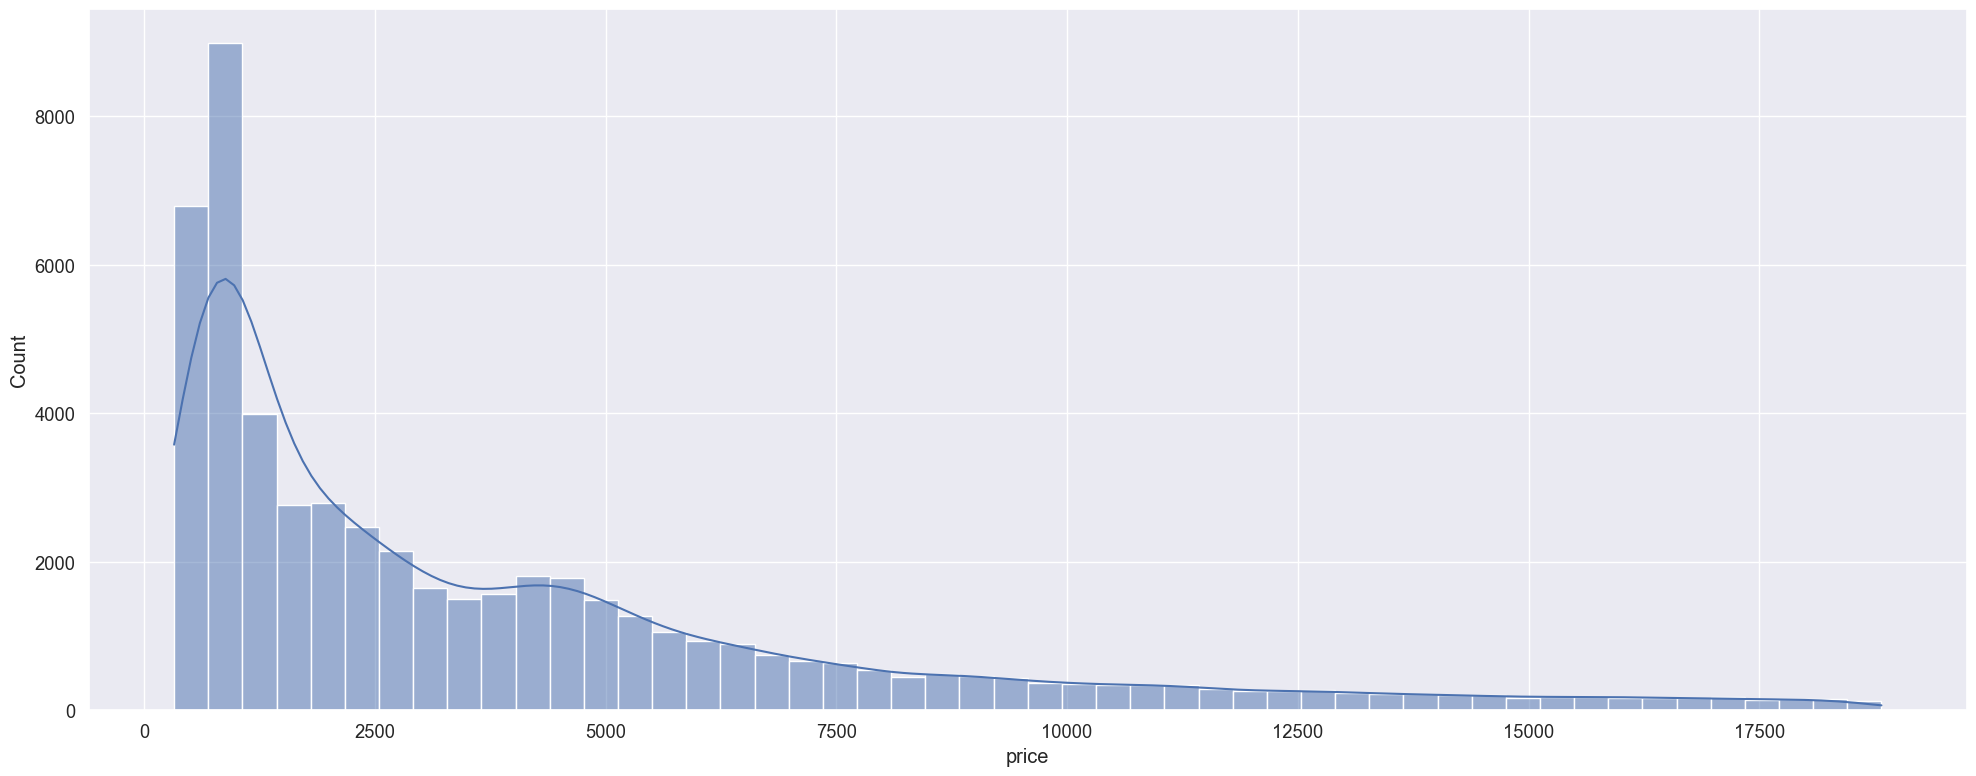

In [59]:
plt.figure(figsize=(20,8))
sns.histplot(x=df['price'],bins=50,kde=True)
plt.tight_layout()
plt.show()

In [64]:
indep = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

regr = linear_model.LinearRegression()
regr.fit(indep, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 3726.449177795681
Coefficients: 
 [10743.90785634   120.75047339   322.69638962   501.85579691
   -79.79270193   -26.75952781  -877.63064106    43.7354626
   -29.33473937]


In [65]:
indep = sm.add_constant(indep)
model = sm.OLS(y, indep).fit()
predictions = model.predict(indep)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 5.845e+04
Date:                Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:14:42   Log-Likelihood:            -4.5972e+05
No. Observations:               53940   AIC:                         9.195e+05
Df Residuals:                   53930   BIC:                         9.195e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3726.4492    425.286      8.762      0.0